<a href="https://colab.research.google.com/github/aditya0811/ML_Projects/blob/master/tmdbdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Project: tmdb data Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
<ul>

  
 Questions
   <li> What kinds of properties are associated with movies that have high revenues?</li> <li>Which genres are most popular from year to year?</li> <li></li>
   </ul>

<a id='wrangling'></a>
## Data Wrangling

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
df_train =  pd.read_csv('/content/tmdb-movies.csv')
df_train.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [30]:
df_train.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='wrangling'></a>
## Data Wrangling

As we know there are multiple values in genres and cast ,hence we use following function to keep track of all those words

In [4]:
set_keywords = set()
for liste_keywords in df_train['genres'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  
    set_keywords = set_keywords.union(liste_keywords)

set_keywords

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [5]:
set_keywords2 = set()
for liste_keywords in df_train['cast'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  
    set_keywords2 = set_keywords2.union(liste_keywords)

set_keywords2

{'Hannah Cresswell',
 'Richard Biggs',
 'Timothy Davis',
 'Susanne SachÃŸe',
 'Sophie NÃ©lisse',
 'Aude Pepin',
 'Eric Wareheim',
 'Arte Johnson',
 'Breanne Racano',
 'Keith Wayne',
 'Cathryn Harrison',
 'Kyle T. Heffner',
 'Martita Hunt',
 'Frank Grillo',
 'Caroline Palmer',
 'Rocco Siffredi',
 'Donald Wiegert',
 'Orla Brady',
 'Lyubov Dobrzhanskaya',
 'Mathilda May',
 'Jean-Pierre Darroussin',
 'Julian Morris',
 'Anna Popplewell',
 'Tom Ward',
 'Jamel Debbouze',
 'Paul Rattray',
 'Cindy Manion',
 'Melissa Ordway',
 'Brett Chukerman',
 'Bob Bergen',
 'Robert Swenson',
 'Jared Leto',
 'Brian Nissen',
 'Jason Thompson',
 'Pat Stanley',
 "Tony O'Dell",
 'Robin Frates',
 'MarÃ\xada Ester Escobar',
 'JÃ©rÃ©my Kapone',
 'Matt LeBlanc',
 'Roger Beck',
 'Dick York',
 'Bill Johnson',
 'Flora Robson',
 'Ethan Vincent',
 'Alexander Calvert',
 'Hidetaka Yoshioka',
 'Jim Parsons',
 'Cori Gonzalez-Macuer',
 'Lionel Abelanski',
 'Jan Munroe',
 'Ellie Kemper',
 'Brad Hunt',
 'Teddy Robin Kwan',
 'Geo

Defining functions for counting variables

In [0]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
   
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [7]:
keyword_occurences, dum = count_word(df_train, 'genres', set_keywords)
keyword_occurences[:]

[['Drama', 4761],
 ['Comedy', 3793],
 ['Thriller', 2908],
 ['Action', 2385],
 ['Romance', 1712],
 ['Horror', 1637],
 ['Adventure', 1471],
 ['Crime', 1355],
 ['Family', 1231],
 ['Science Fiction', 1230],
 ['Fantasy', 916],
 ['Mystery', 810],
 ['Animation', 699],
 ['Documentary', 520],
 ['Music', 408],
 ['History', 334],
 ['War', 270],
 ['Foreign', 188],
 ['TV Movie', 167],
 ['Western', 165]]

In [8]:
keyword_occurences2, dum = count_word(df_train, 'cast', set_keywords2)
keyword_occurences2[:5]

[['Robert De Niro', 72],
 ['Samuel L. Jackson', 71],
 ['Bruce Willis', 62],
 ['Nicolas Cage', 61],
 ['Michael Caine', 53]]

####Cleaning data

In [0]:
df_train.shape[0]
df_new = df_train.isnull().sum(axis=0).reset_index()

In [10]:
df_new.columns = ['column_name', 'missing_count']
df_new[:]

,column_name,missing_count
0,id,0
1,imdb_id,10
2,popularity,0
3,budget,0
4,revenue,0
5,original_title,0
6,cast,76
7,homepage,7930
8,director,44
9,tagline,2824


As most of my analysis will be on cast ,genres,release_year so I will delete those data points which have any one of them missing.

**Limitation**
An alternative to this can be by guessing genres from tagline,keywords which is out of scope here .

In [11]:
df_train.shape[0]

10866

In [0]:
df_train=df_train.dropna(subset = ['cast'])

In [13]:
df_train.shape[0]

10790

In [0]:
df_train=df_train.dropna(subset = ['genres'])

In [15]:
df_train.shape[0]

10768

<a id='eda'></a>
## Exploratory Data Analysis

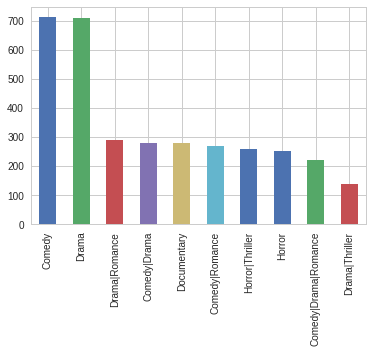

In [16]:
df_train['genres'].value_counts().head(10).plot.bar()

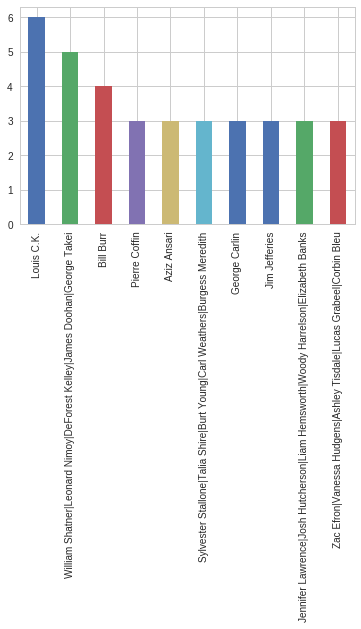

In [45]:
df_train['cast'].value_counts().head(10).plot.bar()

**What kinds of properties are associated with movies that have high revenues?**

Analysing for movies greator than 5 trillion revenues.

In [17]:
df_train[df_train['revenue']>500000000].shape[0]

143

In [0]:
df_a=df_train[df_train['revenue']>500000000]

In [19]:
keyword_occurences, dum = count_word(df_a, 'genres', set_keywords)
keyword_occurences[:]

[['Adventure', 98],
 ['Action', 76],
 ['Fantasy', 51],
 ['Family', 49],
 ['Science Fiction', 46],
 ['Animation', 36],
 ['Thriller', 31],
 ['Comedy', 30],
 ['Drama', 24],
 ['Romance', 12],
 ['Crime', 8],
 ['Mystery', 6],
 ['Horror', 2],
 ['War', 2],
 ['Western', 1],
 ['Foreign', 0],
 ['History', 0],
 ['Music', 0],
 ['Documentary', 0],
 ['TV Movie', 0]]

**We can say that Action ,fantasy and Adventure,Family ,Scifi generate better revenues**

In [0]:
keyword_occurences2, dum = count_word(df_a, 'cast', set_keywords2)
keyword_occurences2[:]

Not much can be concluded from here

**Correlation**

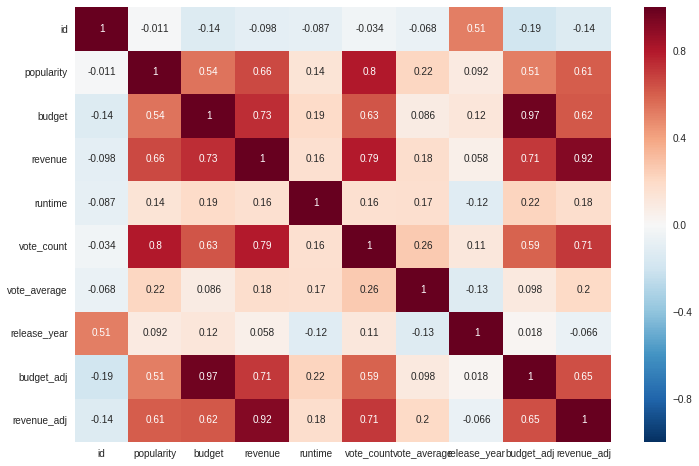

In [50]:
plt.figure(figsize=(12, 8))

df_train = df_train.corr()
sns.heatmap(df_train, 
            xticklabels = df_train.columns.values,
            yticklabels = df_train.columns.values,
            annot = True);

Not much can be concluded,except,revenue and budget_adj are correlated

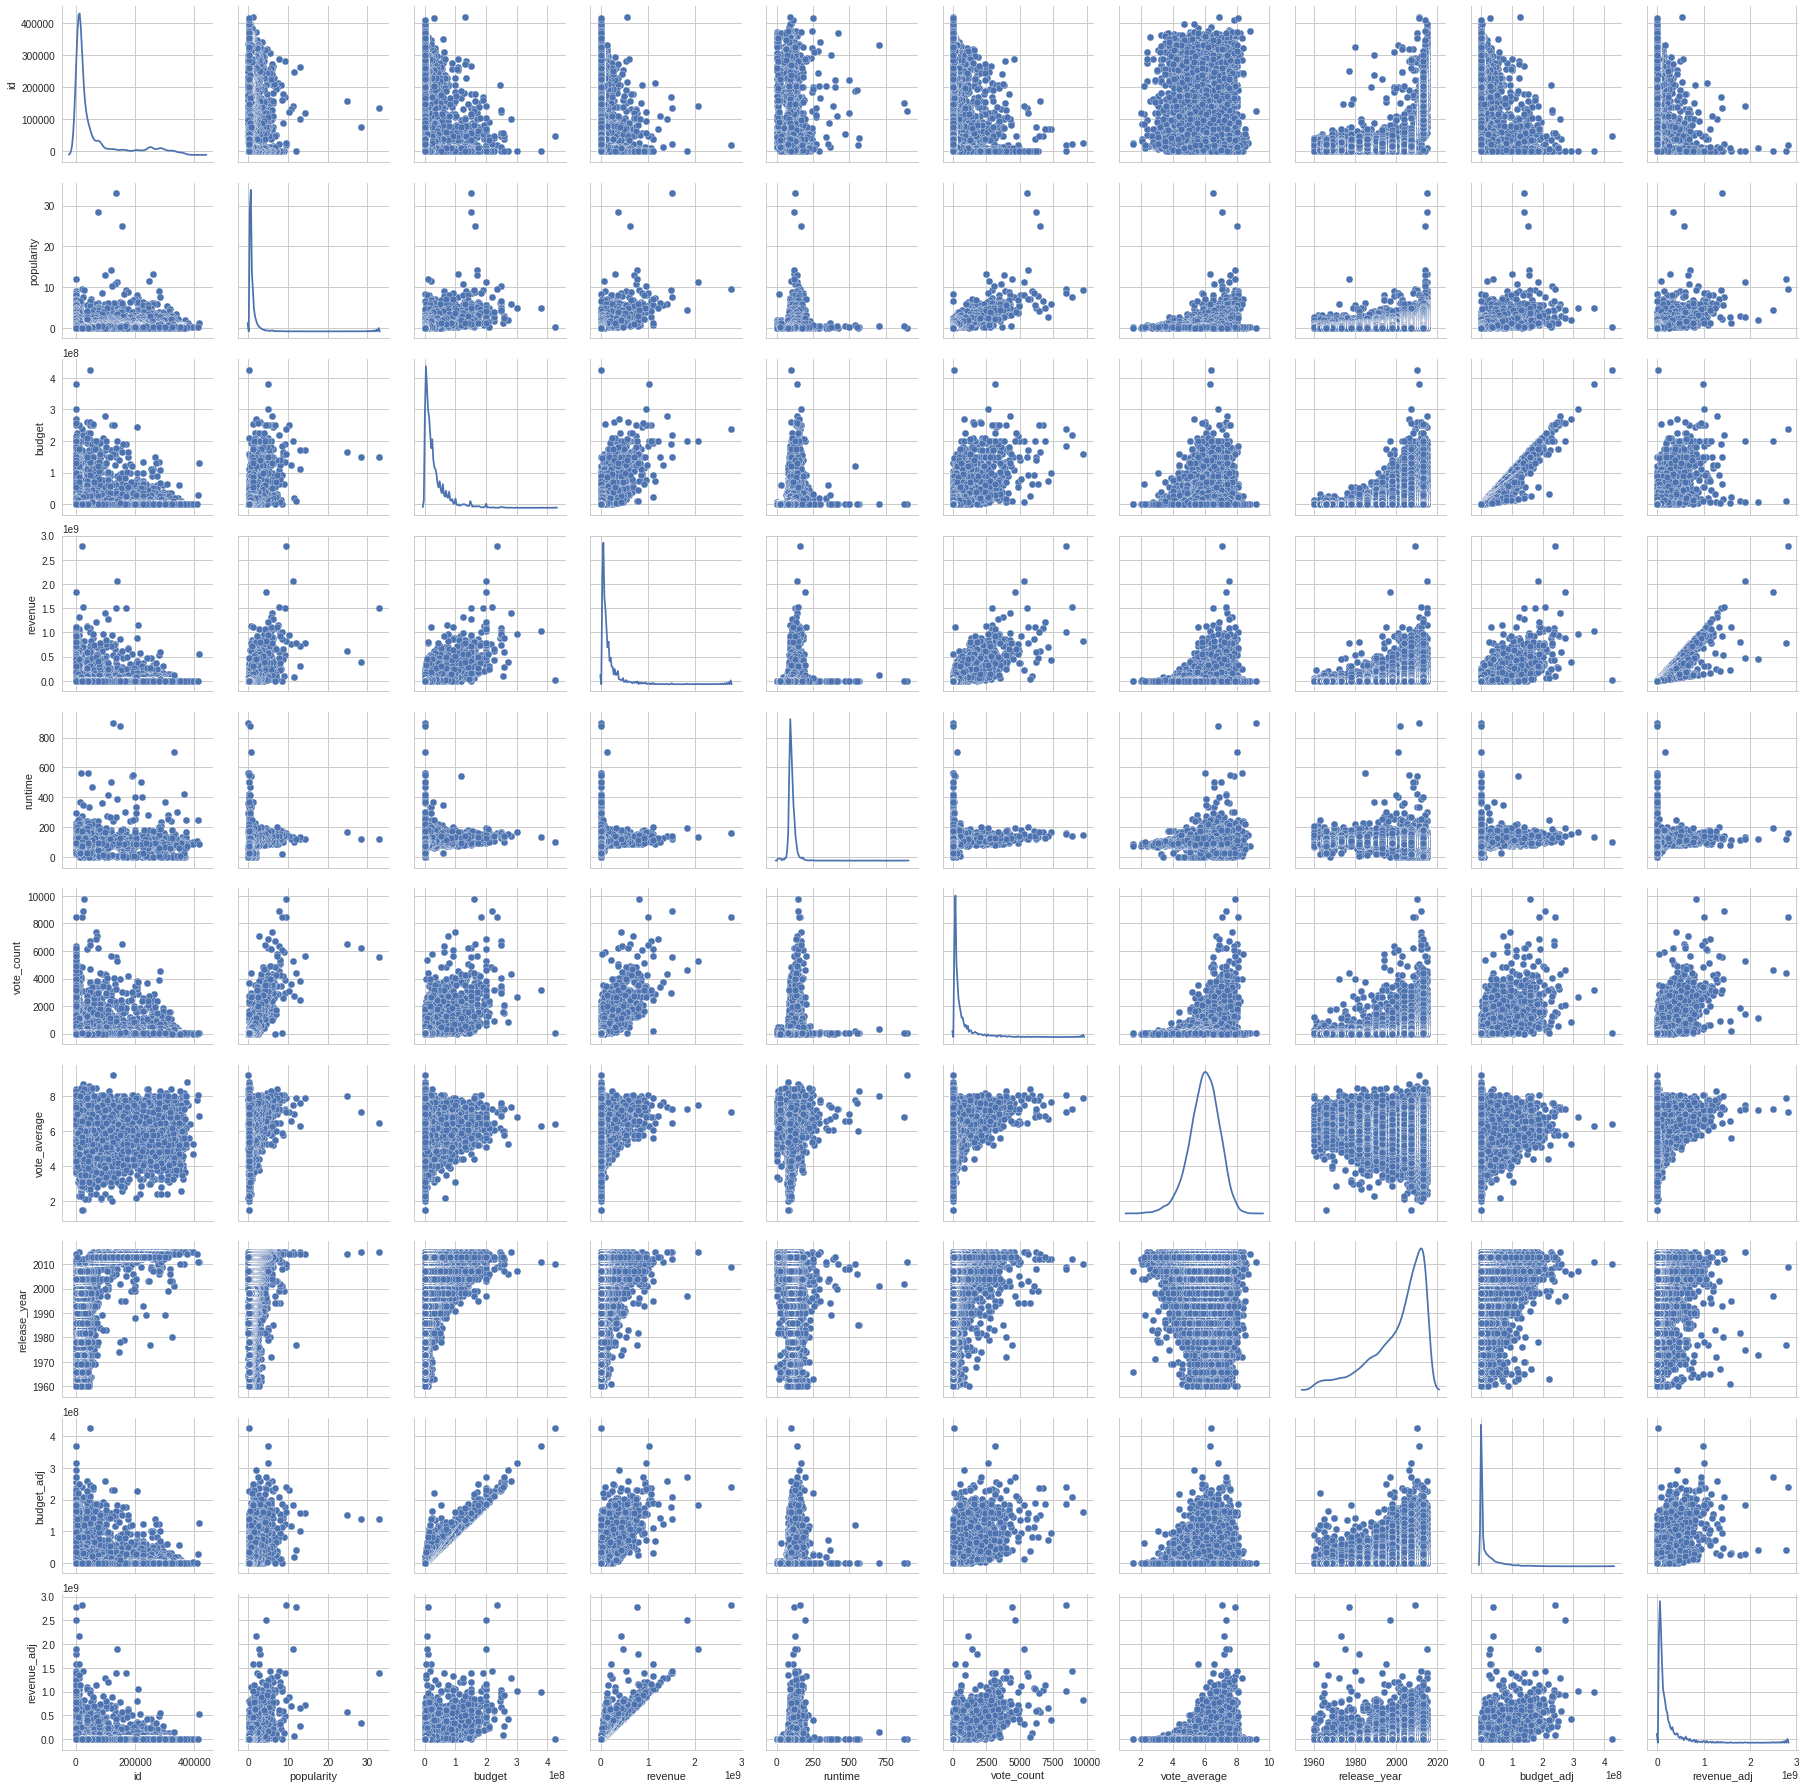

In [64]:
plt.figure(figsize=(14, 14))

sns.pairplot(df_train, diag_kind='kde');

budget and budget_ad,revenue and revenue_adj seems to be correlated which is obvious.

**Which genres are most popular from year to year?**

In [69]:
df_train['release_year'].shape[0]

10768

In [29]:
df_train['release_year'].nunique()

56

In [63]:
for i in range(1959,2015):
  df1 = df_train[df_train['release_year'] == i]
  keyword_occurences, dum = count_word(df1, 'genres', set_keywords)
  print('For year {} : {}'.format(i,keyword_occurences[0][0]))

  

For year 1959 : Animation
For year 1960 : Drama
For year 1961 : Drama
For year 1962 : Drama
For year 1963 : Drama
For year 1964 : Drama
For year 1965 : Drama
For year 1966 : Drama
For year 1967 : Comedy
For year 1968 : Drama
For year 1969 : Drama
For year 1970 : Drama
For year 1971 : Drama
For year 1972 : Drama
For year 1973 : Drama
For year 1974 : Drama
For year 1975 : Drama
For year 1976 : Drama
For year 1977 : Drama
For year 1978 : Drama
For year 1979 : Drama
For year 1980 : Drama
For year 1981 : Drama
For year 1982 : Drama
For year 1983 : Drama
For year 1984 : Drama
For year 1985 : Comedy
For year 1986 : Drama
For year 1987 : Comedy
For year 1988 : Comedy
For year 1989 : Comedy
For year 1990 : Drama
For year 1991 : Drama
For year 1992 : Drama
For year 1993 : Drama
For year 1994 : Comedy
For year 1995 : Drama
For year 1996 : Drama
For year 1997 : Drama
For year 1998 : Drama
For year 1999 : Drama
For year 2000 : Drama
For year 2001 : Comedy
For year 2002 : Drama
For year 2003 : Comed

For year all these years ,we can conclude Drama and comedy were top genres.

**Conclusion**

We came to know from the detailed analysis on release_date,genre,cast the following
<ul>
  <li>We can say that Action ,fantasy and Adventure,Family ,Scifi generate better revenues
  </li>
  <li>For year all these years ,we can conclude Drama and comedy were top genres.
  </li>
  
**Limitation**
An alternative to this can be by guessing genres from tagline,keywords which is out of scope here .
  </ul>
  

In [0]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])